## import os 

In [1]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'cnn-time-stack.ipynb',
 'DataCleaning.ipynb',
 'feature select.ipynb',
 'LSTM.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'README.md',
 'tag盤點表.xlsx',
 'target.jpg',
 'train.csv',
 'train_FeatureSelected.csv',
 'xgboost.ipynb',
 '南亞PA廠資料分析_R6_1219.ipynb']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

# load

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(122774, 16)


,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0716A05,MLPAP_TI-0716A10,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0762A1.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TIC-1721.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,-1.063656,-0.881876,0.436522,0.448320,0.250624,10.862927,0.796892,3.036418,-4.444046,3.099350,-2.620349,-7.954421,-4.023225,-1.012546,-0.088237,0.914125
2016-05-10 08:20:00,-1.063656,-0.881876,0.436522,0.448320,0.250624,10.895595,0.797109,2.863638,-4.435347,3.272202,-2.615166,-7.929338,-4.029503,-0.979549,-0.088237,0.919765
2016-05-10 08:30:00,-1.063656,-0.881876,0.436832,0.448320,0.250624,10.915349,0.797007,3.006192,-4.445760,3.596146,-2.617471,-7.933726,-4.017335,-0.973227,-0.088237,0.926346
2016-05-10 23:40:00,-1.741703,-1.506409,0.411823,0.468479,0.225612,9.160618,0.763807,1.710473,-3.055443,3.361722,-2.612923,-6.819627,-2.798058,-0.838001,-0.088237,0.906781
2016-05-10 23:50:00,-1.741703,-1.441295,0.412133,0.468479,0.225612,9.177640,0.764321,1.822236,-3.043572,3.029452,-2.621043,-6.875791,-2.799185,-0.866150,-0.088237,0.926688


# scale

In [4]:
from sklearn.preprocessing import MinMaxScaler

x_col = df.drop('target',axis=1).columns.tolist()
y_col = 'target'

sc = MinMaxScaler()
df[x_col] = sc.fit_transform(df[x_col])

df.head()

,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0716A05,MLPAP_TI-0716A10,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0762A1.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TIC-1721.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,0.877049,0.882497,0.968352,0.977663,0.957710,0.998757,0.999915,0.877575,0.627877,0.564397,0.091998,0.057676,0.540759,0.574282,0.145161,0.914125
2016-05-10 08:20:00,0.877049,0.882497,0.968352,0.977663,0.957710,0.999531,1.000000,0.863137,0.628425,0.572776,0.092996,0.059450,0.540231,0.574777,0.145161,0.919765
2016-05-10 08:30:00,0.877049,0.882497,0.968465,0.977663,0.957710,1.000000,0.999960,0.875049,0.627769,0.588480,0.092552,0.059139,0.541254,0.574871,0.145161,0.926346
2016-05-10 23:40:00,0.852459,0.854387,0.959309,0.981970,0.951085,0.958377,0.986978,0.766776,0.715429,0.577116,0.093428,0.137926,0.643835,0.576899,0.145161,0.906781
2016-05-10 23:50:00,0.852459,0.857318,0.959423,0.981970,0.951085,0.958781,0.987179,0.776115,0.716178,0.561009,0.091865,0.133954,0.643740,0.576477,0.145161,0.926688


# stack

In [5]:
def train_windows(df, ref_day=15, predict_day=1):
    X_train, Y_train, i_lst = [], [], []
    for i in tqdm(range(df.shape[0]-predict_day-ref_day)):
        X_train.append(np.array(df.iloc[i:i+ref_day][x_col]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day][y_col]))
        i_lst.append(df.iloc[i+ref_day:i+ref_day+predict_day].index[0])
    return np.array(X_train), np.array(Y_train), i_lst

In [6]:
X, y, i_lst = train_windows(df, ref_day=15, predict_day=1)
print(len(X),len(y),len(i_lst))


122758 122758 122758


In [13]:
y = pd.Series(y.ravel(),index=i_lst,name='y')
y.head()

2016-05-13 15:00:00    0.903952
2016-05-13 15:10:00    0.888240
2016-05-13 15:20:00    0.894072
2016-05-13 15:30:00    0.889203
2016-05-13 15:40:00    0.928332
Name: y, dtype: float64

# Visualization

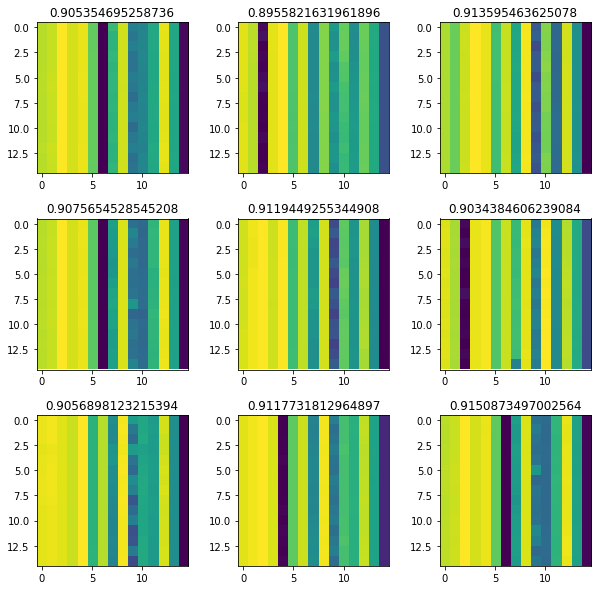

In [15]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    idx = np.random.randint(0,len(X))
    plt.imshow(X[idx])
    plt.title(y[idx])

# reshape

In [20]:
X = X.reshape(-1,15,15,1)
print(X.shape,y.shape)

(122758, 15, 15, 1) (122758,)


# split

In [21]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
X_val, X_test ,y_val ,y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 7)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(85930, 15, 15, 1) (85930,)
(18414, 15, 15, 1) (18414,)
(18414, 15, 15, 1) (18414,)


# Model

In [22]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam
import warnings;warnings.simplefilter('ignore')

Using TensorFlow backend.


In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X[0].shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dense(1))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
______________________________________

In [24]:
model.compile(optimizer=Adam(lr=0.0001), loss="mse", metrics=["mse"])

In [25]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,mode='min')

# fit

In [26]:
history = model.fit(X_train,y_train,
                    batch_size = 256,
                    epochs = 100,
                    validation_data = (X_val,y_val),
                    verbose = 1,
                    callbacks = [es])


Train on 85930 samples, validate on 18414 samples
Epoch 1/100


55040/85930 [==================>...........] - ETA: 1:14 - loss: 0.2713 - mse: 0.271 - ETA: 53s - loss: 0.2016 - mse: 0.201 - ETA: 46s - loss: 0.1460 - mse: 0.14 - ETA: 43s - loss: 0.1133 - mse: 0.11 - ETA: 40s - loss: 0.1018 - mse: 0.10 - ETA: 39s - loss: 0.1021 - mse: 0.10 - ETA: 38s - loss: 0.1027 - mse: 0.10 - ETA: 37s - loss: 0.0993 - mse: 0.09 - ETA: 37s - loss: 0.0936 - mse: 0.09 - ETA: 36s - loss: 0.0861 - mse: 0.08 - ETA: 36s - loss: 0.0790 - mse: 0.07 - ETA: 35s - loss: 0.0735 - mse: 0.07 - ETA: 35s - loss: 0.0698 - mse: 0.06 - ETA: 34s - loss: 0.0677 - mse: 0.06 - ETA: 34s - loss: 0.0660 - mse: 0.06 - ETA: 34s - loss: 0.0646 - mse: 0.06 - ETA: 34s - loss: 0.0628 - mse: 0.06 - ETA: 33s - loss: 0.0605 - mse: 0.06 - ETA: 33s - loss: 0.0581 - mse: 0.05 - ETA: 33s - loss: 0.0557 - mse: 0.05 - ETA: 33s - loss: 0.0534 - mse: 0.05 - ETA: 33s - loss: 0.0516 - mse: 0.05 - ETA: 33s - loss: 0.0501 - mse: 0.05 - ETA: 32s - loss: 0.0488 - mse: 0.04 - ETA: 32s - loss: 0.0477 - mse: 0.04 - 

85930/85930 [==============================] - ETA: 12s - loss: 0.0105 - mse: 0.01 - ETA: 12s - loss: 0.0105 - mse: 0.01 - ETA: 12s - loss: 0.0104 - mse: 0.01 - ETA: 12s - loss: 0.0104 - mse: 0.01 - ETA: 11s - loss: 0.0104 - mse: 0.01 - ETA: 11s - loss: 0.0104 - mse: 0.01 - ETA: 11s - loss: 0.0103 - mse: 0.01 - ETA: 11s - loss: 0.0103 - mse: 0.01 - ETA: 11s - loss: 0.0103 - mse: 0.01 - ETA: 11s - loss: 0.0102 - mse: 0.01 - ETA: 11s - loss: 0.0102 - mse: 0.01 - ETA: 11s - loss: 0.0102 - mse: 0.01 - ETA: 11s - loss: 0.0101 - mse: 0.01 - ETA: 11s - loss: 0.0101 - mse: 0.01 - ETA: 11s - loss: 0.0101 - mse: 0.01 - ETA: 10s - loss: 0.0101 - mse: 0.01 - ETA: 10s - loss: 0.0100 - mse: 0.01 - ETA: 10s - loss: 0.0100 - mse: 0.01 - ETA: 10s - loss: 0.0100 - mse: 0.01 - ETA: 10s - loss: 0.0099 - mse: 0.00 - ETA: 10s - loss: 0.0099 - mse: 0.00 - ETA: 10s - loss: 0.0099 - mse: 0.00 - ETA: 10s - loss: 0.0099 - mse: 0.00 - ETA: 10s - loss: 0.0098 - mse: 0.00 - ETA: 9s - loss: 0.0098 - mse: 0.0098 - ET

55040/85930 [==================>...........] - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 35s - loss: 0.0025 - mse: 0.00 - ETA: 34s - loss: 0.0026 - mse: 0.00 - ETA: 35s - loss: 0.0025 - mse: 0.00 - ETA: 34s - loss: 0.0026 - mse: 0.00 - ETA: 35s - loss: 0.0025 - mse: 0.00 - ETA: 35s - loss: 0.0026 - mse: 0.00 - ETA: 34s - loss: 0.0025 - mse: 0.00 - ETA: 34s - loss: 0.0025 - mse: 0.00 - ETA: 34s - loss: 0.0025 - mse: 0.00 - ETA: 33s - loss: 0.0025 - mse: 0.00 - ETA: 33s - loss: 0.0025 - mse: 0.00 - ETA: 33s - loss: 0.0025 - mse: 0.00 - ETA: 33s - loss: 0.0025 - mse: 0.00 - ETA: 33s - loss: 0.0025 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA: 33s - loss: 0.0024 - mse: 0.00 - ETA

85930/85930 [==============================] - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mse: 0.00 - ETA: 11s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mse: 0.00 - ETA: 9s - loss: 0.0018 - mse: 0.0018 - ETA: 9s - loss: 0.0018 - mse: 0.001 - ETA: 9s - loss: 0.0018 - mse: 0.001 - ETA: 9s - loss: 0.0018 - mse: 0.001 - ETA: 9s - loss: 0.0018 - mse: 0.001 - ET

54784/85930 [==================>...........] - ETA: 35s - loss: 0.0012 - mse: 0.00 - ETA: 37s - loss: 0.0011 - mse: 0.00 - ETA: 37s - loss: 0.0012 - mse: 0.00 - ETA: 36s - loss: 0.0012 - mse: 0.00 - ETA: 35s - loss: 0.0012 - mse: 0.00 - ETA: 35s - loss: 0.0011 - mse: 0.00 - ETA: 35s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 34s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA: 33s - loss: 0.0011 - mse: 0.00 - ETA

85930/85930 [==============================] - ETA: 12s - loss: 9.9812e-04 - mse: 9.9812e- - ETA: 12s - loss: 9.9720e-04 - mse: 9.9720e- - ETA: 12s - loss: 9.9628e-04 - mse: 9.9628e- - ETA: 11s - loss: 9.9544e-04 - mse: 9.9544e- - ETA: 11s - loss: 9.9452e-04 - mse: 9.9452e- - ETA: 11s - loss: 9.9322e-04 - mse: 9.9322e- - ETA: 11s - loss: 9.9314e-04 - mse: 9.9314e- - ETA: 11s - loss: 9.9170e-04 - mse: 9.9170e- - ETA: 11s - loss: 9.9158e-04 - mse: 9.9158e- - ETA: 11s - loss: 9.9084e-04 - mse: 9.9084e- - ETA: 11s - loss: 9.8988e-04 - mse: 9.8988e- - ETA: 11s - loss: 9.8904e-04 - mse: 9.8904e- - ETA: 10s - loss: 9.8834e-04 - mse: 9.8834e- - ETA: 10s - loss: 9.8766e-04 - mse: 9.8766e- - ETA: 10s - loss: 9.8710e-04 - mse: 9.8710e- - ETA: 10s - loss: 9.8609e-04 - mse: 9.8609e- - ETA: 10s - loss: 9.8573e-04 - mse: 9.8573e- - ETA: 10s - loss: 9.8560e-04 - mse: 9.8560e- - ETA: 10s - loss: 9.8468e-04 - mse: 9.8468e- - ETA: 10s - loss: 9.8370e-04 - mse: 9.8370e- - ETA: 10s - loss: 9.8304e-04 - mse

45568/85930 [==============>...............] - ETA: 28s - loss: 9.2552e-04 - mse: 9.2552e- - ETA: 30s - loss: 8.4474e-04 - mse: 8.4474e- - ETA: 31s - loss: 7.9645e-04 - mse: 7.9645e- - ETA: 30s - loss: 7.7934e-04 - mse: 7.7934e- - ETA: 30s - loss: 7.5299e-04 - mse: 7.5299e- - ETA: 31s - loss: 7.6826e-04 - mse: 7.6826e- - ETA: 30s - loss: 7.8047e-04 - mse: 7.8047e- - ETA: 30s - loss: 7.7340e-04 - mse: 7.7340e- - ETA: 30s - loss: 7.6625e-04 - mse: 7.6625e- - ETA: 30s - loss: 7.6007e-04 - mse: 7.6007e- - ETA: 30s - loss: 7.6106e-04 - mse: 7.6106e- - ETA: 30s - loss: 7.6118e-04 - mse: 7.6118e- - ETA: 30s - loss: 7.6113e-04 - mse: 7.6113e- - ETA: 30s - loss: 7.5815e-04 - mse: 7.5815e- - ETA: 30s - loss: 7.5853e-04 - mse: 7.5853e- - ETA: 30s - loss: 7.5142e-04 - mse: 7.5142e- - ETA: 30s - loss: 7.4950e-04 - mse: 7.4950e- - ETA: 30s - loss: 7.4844e-04 - mse: 7.4844e- - ETA: 30s - loss: 7.4784e-04 - mse: 7.4784e- - ETA: 30s - loss: 7.4562e-04 - mse: 7.4562e- - ETA: 29s - loss: 7.5106e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 7.0630e-04 - mse: 7.0630e- - ETA: 15s - loss: 7.0606e-04 - mse: 7.0606e- - ETA: 15s - loss: 7.0531e-04 - mse: 7.0531e- - ETA: 14s - loss: 7.0546e-04 - mse: 7.0546e- - ETA: 14s - loss: 7.0554e-04 - mse: 7.0554e- - ETA: 14s - loss: 7.0494e-04 - mse: 7.0494e- - ETA: 14s - loss: 7.0483e-04 - mse: 7.0483e- - ETA: 14s - loss: 7.0433e-04 - mse: 7.0433e- - ETA: 14s - loss: 7.0416e-04 - mse: 7.0416e- - ETA: 14s - loss: 7.0394e-04 - mse: 7.0394e- - ETA: 14s - loss: 7.0403e-04 - mse: 7.0403e- - ETA: 14s - loss: 7.0365e-04 - mse: 7.0365e- - ETA: 14s - loss: 7.0364e-04 - mse: 7.0364e- - ETA: 13s - loss: 7.0301e-04 - mse: 7.0302e- - ETA: 13s - loss: 7.0281e-04 - mse: 7.0281e- - ETA: 13s - loss: 7.0283e-04 - mse: 7.0283e- - ETA: 13s - loss: 7.0230e-04 - mse: 7.0230e- - ETA: 13s - loss: 7.0219e-04 - mse: 7.0219e- - ETA: 13s - loss: 7.0144e-04 - mse: 7.0144e- - ETA: 13s - loss: 7.0123e-04 - mse: 7.0123e- - ETA: 13s - loss: 7.0107e-04 - mse

45568/85930 [==============>...............] - ETA: 45s - loss: 6.1446e-04 - mse: 6.1446e- - ETA: 43s - loss: 5.7337e-04 - mse: 5.7337e- - ETA: 41s - loss: 5.9297e-04 - mse: 5.9297e- - ETA: 40s - loss: 5.6901e-04 - mse: 5.6901e- - ETA: 39s - loss: 5.8139e-04 - mse: 5.8139e- - ETA: 38s - loss: 5.8688e-04 - mse: 5.8688e- - ETA: 38s - loss: 5.7330e-04 - mse: 5.7330e- - ETA: 38s - loss: 5.7255e-04 - mse: 5.7255e- - ETA: 38s - loss: 5.6949e-04 - mse: 5.6949e- - ETA: 39s - loss: 5.6009e-04 - mse: 5.6009e- - ETA: 39s - loss: 5.5762e-04 - mse: 5.5762e- - ETA: 39s - loss: 5.6133e-04 - mse: 5.6133e- - ETA: 38s - loss: 5.6389e-04 - mse: 5.6389e- - ETA: 38s - loss: 5.6303e-04 - mse: 5.6303e- - ETA: 38s - loss: 5.6086e-04 - mse: 5.6086e- - ETA: 38s - loss: 5.5953e-04 - mse: 5.5953e- - ETA: 38s - loss: 5.5912e-04 - mse: 5.5912e- - ETA: 38s - loss: 5.5932e-04 - mse: 5.5932e- - ETA: 38s - loss: 5.6375e-04 - mse: 5.6375e- - ETA: 38s - loss: 5.6560e-04 - mse: 5.6560e- - ETA: 38s - loss: 5.6364e-04 - mse

85930/85930 [==============================] - ETA: 17s - loss: 5.5099e-04 - mse: 5.5099e- - ETA: 17s - loss: 5.5077e-04 - mse: 5.5077e- - ETA: 17s - loss: 5.5001e-04 - mse: 5.5001e- - ETA: 17s - loss: 5.4992e-04 - mse: 5.4992e- - ETA: 17s - loss: 5.4959e-04 - mse: 5.4959e- - ETA: 16s - loss: 5.4934e-04 - mse: 5.4934e- - ETA: 16s - loss: 5.4931e-04 - mse: 5.4931e- - ETA: 16s - loss: 5.4878e-04 - mse: 5.4879e- - ETA: 16s - loss: 5.4802e-04 - mse: 5.4802e- - ETA: 16s - loss: 5.4765e-04 - mse: 5.4765e- - ETA: 16s - loss: 5.4775e-04 - mse: 5.4775e- - ETA: 16s - loss: 5.4725e-04 - mse: 5.4725e- - ETA: 16s - loss: 5.4781e-04 - mse: 5.4781e- - ETA: 15s - loss: 5.4753e-04 - mse: 5.4753e- - ETA: 15s - loss: 5.4788e-04 - mse: 5.4788e- - ETA: 15s - loss: 5.4824e-04 - mse: 5.4824e- - ETA: 15s - loss: 5.4753e-04 - mse: 5.4753e- - ETA: 15s - loss: 5.4714e-04 - mse: 5.4714e- - ETA: 15s - loss: 5.4680e-04 - mse: 5.4680e- - ETA: 15s - loss: 5.4686e-04 - mse: 5.4686e- - ETA: 15s - loss: 5.4639e-04 - mse

45568/85930 [==============>...............] - ETA: 30s - loss: 5.4897e-04 - mse: 5.4897e- - ETA: 29s - loss: 5.0778e-04 - mse: 5.0778e- - ETA: 30s - loss: 4.9283e-04 - mse: 4.9283e- - ETA: 32s - loss: 4.9056e-04 - mse: 4.9056e- - ETA: 33s - loss: 4.9160e-04 - mse: 4.9160e- - ETA: 33s - loss: 4.9421e-04 - mse: 4.9421e- - ETA: 33s - loss: 4.8628e-04 - mse: 4.8628e- - ETA: 33s - loss: 4.8987e-04 - mse: 4.8987e- - ETA: 33s - loss: 4.8179e-04 - mse: 4.8179e- - ETA: 33s - loss: 4.8424e-04 - mse: 4.8424e- - ETA: 32s - loss: 4.8458e-04 - mse: 4.8459e- - ETA: 32s - loss: 4.8447e-04 - mse: 4.8447e- - ETA: 32s - loss: 4.8761e-04 - mse: 4.8761e- - ETA: 32s - loss: 4.9029e-04 - mse: 4.9029e- - ETA: 32s - loss: 4.9048e-04 - mse: 4.9048e- - ETA: 31s - loss: 4.8901e-04 - mse: 4.8901e- - ETA: 31s - loss: 4.8581e-04 - mse: 4.8581e- - ETA: 31s - loss: 4.9318e-04 - mse: 4.9318e- - ETA: 31s - loss: 4.9777e-04 - mse: 4.9777e- - ETA: 31s - loss: 4.9508e-04 - mse: 4.9508e- - ETA: 31s - loss: 4.9800e-04 - mse

85930/85930 [==============================] - ETA: 16s - loss: 4.8233e-04 - mse: 4.8233e- - ETA: 16s - loss: 4.8246e-04 - mse: 4.8246e- - ETA: 15s - loss: 4.8217e-04 - mse: 4.8217e- - ETA: 15s - loss: 4.8187e-04 - mse: 4.8187e- - ETA: 15s - loss: 4.8165e-04 - mse: 4.8165e- - ETA: 15s - loss: 4.8173e-04 - mse: 4.8173e- - ETA: 15s - loss: 4.8202e-04 - mse: 4.8202e- - ETA: 15s - loss: 4.8182e-04 - mse: 4.8182e- - ETA: 15s - loss: 4.8150e-04 - mse: 4.8150e- - ETA: 15s - loss: 4.8127e-04 - mse: 4.8127e- - ETA: 15s - loss: 4.8092e-04 - mse: 4.8092e- - ETA: 14s - loss: 4.8094e-04 - mse: 4.8094e- - ETA: 14s - loss: 4.8067e-04 - mse: 4.8067e- - ETA: 14s - loss: 4.8030e-04 - mse: 4.8030e- - ETA: 14s - loss: 4.8002e-04 - mse: 4.8002e- - ETA: 14s - loss: 4.7974e-04 - mse: 4.7974e- - ETA: 14s - loss: 4.7957e-04 - mse: 4.7957e- - ETA: 14s - loss: 4.7921e-04 - mse: 4.7921e- - ETA: 14s - loss: 4.7878e-04 - mse: 4.7878e- - ETA: 14s - loss: 4.7824e-04 - mse: 4.7824e- - ETA: 14s - loss: 4.7809e-04 - mse

45568/85930 [==============>...............] - ETA: 26s - loss: 3.7337e-04 - mse: 3.7337e- - ETA: 30s - loss: 4.0282e-04 - mse: 4.0282e- - ETA: 31s - loss: 4.1061e-04 - mse: 4.1061e- - ETA: 30s - loss: 4.0531e-04 - mse: 4.0531e- - ETA: 30s - loss: 3.9366e-04 - mse: 3.9366e- - ETA: 31s - loss: 4.0818e-04 - mse: 4.0818e- - ETA: 31s - loss: 4.1491e-04 - mse: 4.1491e- - ETA: 31s - loss: 4.1307e-04 - mse: 4.1307e- - ETA: 31s - loss: 4.1032e-04 - mse: 4.1032e- - ETA: 31s - loss: 4.1021e-04 - mse: 4.1021e- - ETA: 31s - loss: 4.1660e-04 - mse: 4.1660e- - ETA: 30s - loss: 4.1534e-04 - mse: 4.1534e- - ETA: 30s - loss: 4.1262e-04 - mse: 4.1262e- - ETA: 30s - loss: 4.1321e-04 - mse: 4.1321e- - ETA: 31s - loss: 4.1199e-04 - mse: 4.1199e- - ETA: 31s - loss: 4.1556e-04 - mse: 4.1556e- - ETA: 31s - loss: 4.1815e-04 - mse: 4.1815e- - ETA: 31s - loss: 4.1676e-04 - mse: 4.1676e- - ETA: 30s - loss: 4.1807e-04 - mse: 4.1807e- - ETA: 30s - loss: 4.1663e-04 - mse: 4.1663e- - ETA: 30s - loss: 4.1543e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 4.1612e-04 - mse: 4.1612e- - ETA: 15s - loss: 4.1607e-04 - mse: 4.1607e- - ETA: 15s - loss: 4.1595e-04 - mse: 4.1595e- - ETA: 15s - loss: 4.1578e-04 - mse: 4.1578e- - ETA: 15s - loss: 4.1620e-04 - mse: 4.1620e- - ETA: 15s - loss: 4.1641e-04 - mse: 4.1641e- - ETA: 15s - loss: 4.1638e-04 - mse: 4.1638e- - ETA: 15s - loss: 4.1643e-04 - mse: 4.1643e- - ETA: 15s - loss: 4.1599e-04 - mse: 4.1599e- - ETA: 14s - loss: 4.1601e-04 - mse: 4.1601e- - ETA: 14s - loss: 4.1584e-04 - mse: 4.1584e- - ETA: 14s - loss: 4.1593e-04 - mse: 4.1593e- - ETA: 14s - loss: 4.1588e-04 - mse: 4.1588e- - ETA: 14s - loss: 4.1559e-04 - mse: 4.1559e- - ETA: 14s - loss: 4.1589e-04 - mse: 4.1589e- - ETA: 14s - loss: 4.1560e-04 - mse: 4.1560e- - ETA: 14s - loss: 4.1538e-04 - mse: 4.1538e- - ETA: 14s - loss: 4.1525e-04 - mse: 4.1525e- - ETA: 13s - loss: 4.1493e-04 - mse: 4.1493e- - ETA: 13s - loss: 4.1535e-04 - mse: 4.1535e- - ETA: 13s - loss: 4.1533e-04 - mse

45568/85930 [==============>...............] - ETA: 26s - loss: 3.6544e-04 - mse: 3.6544e- - ETA: 30s - loss: 3.6039e-04 - mse: 3.6039e- - ETA: 32s - loss: 3.7410e-04 - mse: 3.7410e- - ETA: 32s - loss: 3.7449e-04 - mse: 3.7449e- - ETA: 32s - loss: 3.6442e-04 - mse: 3.6442e- - ETA: 34s - loss: 3.6632e-04 - mse: 3.6632e- - ETA: 34s - loss: 3.6881e-04 - mse: 3.6881e- - ETA: 34s - loss: 3.7219e-04 - mse: 3.7219e- - ETA: 33s - loss: 3.7673e-04 - mse: 3.7673e- - ETA: 34s - loss: 3.7964e-04 - mse: 3.7964e- - ETA: 34s - loss: 3.7708e-04 - mse: 3.7708e- - ETA: 34s - loss: 3.8056e-04 - mse: 3.8056e- - ETA: 33s - loss: 3.7966e-04 - mse: 3.7966e- - ETA: 33s - loss: 3.7706e-04 - mse: 3.7706e- - ETA: 33s - loss: 3.7434e-04 - mse: 3.7434e- - ETA: 32s - loss: 3.7438e-04 - mse: 3.7438e- - ETA: 32s - loss: 3.7541e-04 - mse: 3.7541e- - ETA: 32s - loss: 3.7751e-04 - mse: 3.7751e- - ETA: 32s - loss: 3.7724e-04 - mse: 3.7724e- - ETA: 32s - loss: 3.7751e-04 - mse: 3.7751e- - ETA: 32s - loss: 3.7662e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 3.8433e-04 - mse: 3.8433e- - ETA: 15s - loss: 3.8419e-04 - mse: 3.8419e- - ETA: 15s - loss: 3.8394e-04 - mse: 3.8394e- - ETA: 15s - loss: 3.8369e-04 - mse: 3.8369e- - ETA: 15s - loss: 3.8391e-04 - mse: 3.8391e- - ETA: 15s - loss: 3.8384e-04 - mse: 3.8384e- - ETA: 15s - loss: 3.8358e-04 - mse: 3.8358e- - ETA: 15s - loss: 3.8322e-04 - mse: 3.8322e- - ETA: 14s - loss: 3.8315e-04 - mse: 3.8315e- - ETA: 14s - loss: 3.8302e-04 - mse: 3.8302e- - ETA: 14s - loss: 3.8323e-04 - mse: 3.8323e- - ETA: 14s - loss: 3.8295e-04 - mse: 3.8295e- - ETA: 14s - loss: 3.8286e-04 - mse: 3.8286e- - ETA: 14s - loss: 3.8282e-04 - mse: 3.8282e- - ETA: 14s - loss: 3.8275e-04 - mse: 3.8275e- - ETA: 14s - loss: 3.8286e-04 - mse: 3.8286e- - ETA: 14s - loss: 3.8275e-04 - mse: 3.8275e- - ETA: 13s - loss: 3.8264e-04 - mse: 3.8264e- - ETA: 13s - loss: 3.8261e-04 - mse: 3.8261e- - ETA: 13s - loss: 3.8289e-04 - mse: 3.8289e- - ETA: 13s - loss: 3.8281e-04 - mse

45568/85930 [==============>...............] - ETA: 30s - loss: 4.2572e-04 - mse: 4.2572e- - ETA: 31s - loss: 4.1022e-04 - mse: 4.1022e- - ETA: 32s - loss: 4.2116e-04 - mse: 4.2116e- - ETA: 32s - loss: 4.1451e-04 - mse: 4.1451e- - ETA: 31s - loss: 3.9832e-04 - mse: 3.9832e- - ETA: 31s - loss: 4.1818e-04 - mse: 4.1818e- - ETA: 31s - loss: 4.1046e-04 - mse: 4.1046e- - ETA: 31s - loss: 4.1357e-04 - mse: 4.1357e- - ETA: 31s - loss: 4.2037e-04 - mse: 4.2037e- - ETA: 31s - loss: 4.1546e-04 - mse: 4.1546e- - ETA: 31s - loss: 4.1238e-04 - mse: 4.1238e- - ETA: 31s - loss: 4.0706e-04 - mse: 4.0706e- - ETA: 31s - loss: 4.0735e-04 - mse: 4.0735e- - ETA: 31s - loss: 4.0127e-04 - mse: 4.0127e- - ETA: 31s - loss: 3.9655e-04 - mse: 3.9655e- - ETA: 31s - loss: 3.9657e-04 - mse: 3.9657e- - ETA: 31s - loss: 3.8988e-04 - mse: 3.8988e- - ETA: 30s - loss: 3.8827e-04 - mse: 3.8827e- - ETA: 30s - loss: 3.8389e-04 - mse: 3.8389e- - ETA: 30s - loss: 3.8239e-04 - mse: 3.8239e- - ETA: 30s - loss: 3.8018e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 3.4642e-04 - mse: 3.4642e- - ETA: 15s - loss: 3.4648e-04 - mse: 3.4648e- - ETA: 14s - loss: 3.4631e-04 - mse: 3.4631e- - ETA: 14s - loss: 3.4620e-04 - mse: 3.4620e- - ETA: 14s - loss: 3.4582e-04 - mse: 3.4582e- - ETA: 14s - loss: 3.4546e-04 - mse: 3.4546e- - ETA: 14s - loss: 3.4542e-04 - mse: 3.4542e- - ETA: 14s - loss: 3.4540e-04 - mse: 3.4540e- - ETA: 14s - loss: 3.4502e-04 - mse: 3.4502e- - ETA: 14s - loss: 3.4475e-04 - mse: 3.4475e- - ETA: 14s - loss: 3.4469e-04 - mse: 3.4469e- - ETA: 14s - loss: 3.4461e-04 - mse: 3.4461e- - ETA: 14s - loss: 3.4439e-04 - mse: 3.4439e- - ETA: 13s - loss: 3.4435e-04 - mse: 3.4435e- - ETA: 13s - loss: 3.4431e-04 - mse: 3.4431e- - ETA: 13s - loss: 3.4426e-04 - mse: 3.4426e- - ETA: 13s - loss: 3.4400e-04 - mse: 3.4400e- - ETA: 13s - loss: 3.4396e-04 - mse: 3.4396e- - ETA: 13s - loss: 3.4389e-04 - mse: 3.4389e- - ETA: 13s - loss: 3.4367e-04 - mse: 3.4367e- - ETA: 13s - loss: 3.4384e-04 - mse

45568/85930 [==============>...............] - ETA: 28s - loss: 3.7142e-04 - mse: 3.7142e- - ETA: 30s - loss: 3.3043e-04 - mse: 3.3043e- - ETA: 32s - loss: 3.4145e-04 - mse: 3.4145e- - ETA: 33s - loss: 3.3825e-04 - mse: 3.3825e- - ETA: 32s - loss: 3.2736e-04 - mse: 3.2736e- - ETA: 33s - loss: 3.3026e-04 - mse: 3.3026e- - ETA: 33s - loss: 3.2576e-04 - mse: 3.2576e- - ETA: 33s - loss: 3.2767e-04 - mse: 3.2767e- - ETA: 33s - loss: 3.2381e-04 - mse: 3.2381e- - ETA: 33s - loss: 3.3249e-04 - mse: 3.3249e- - ETA: 33s - loss: 3.3331e-04 - mse: 3.3331e- - ETA: 33s - loss: 3.3316e-04 - mse: 3.3316e- - ETA: 33s - loss: 3.3128e-04 - mse: 3.3128e- - ETA: 33s - loss: 3.2913e-04 - mse: 3.2913e- - ETA: 33s - loss: 3.2711e-04 - mse: 3.2711e- - ETA: 32s - loss: 3.2535e-04 - mse: 3.2535e- - ETA: 32s - loss: 3.2424e-04 - mse: 3.2424e- - ETA: 32s - loss: 3.2200e-04 - mse: 3.2200e- - ETA: 32s - loss: 3.2164e-04 - mse: 3.2164e- - ETA: 32s - loss: 3.2222e-04 - mse: 3.2222e- - ETA: 32s - loss: 3.1986e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 3.2011e-04 - mse: 3.2011e- - ETA: 15s - loss: 3.2027e-04 - mse: 3.2027e- - ETA: 15s - loss: 3.2027e-04 - mse: 3.2027e- - ETA: 15s - loss: 3.2025e-04 - mse: 3.2025e- - ETA: 15s - loss: 3.2058e-04 - mse: 3.2058e- - ETA: 15s - loss: 3.2038e-04 - mse: 3.2038e- - ETA: 15s - loss: 3.2026e-04 - mse: 3.2026e- - ETA: 15s - loss: 3.2016e-04 - mse: 3.2016e- - ETA: 15s - loss: 3.2008e-04 - mse: 3.2008e- - ETA: 14s - loss: 3.2015e-04 - mse: 3.2015e- - ETA: 14s - loss: 3.1990e-04 - mse: 3.1990e- - ETA: 14s - loss: 3.1972e-04 - mse: 3.1972e- - ETA: 14s - loss: 3.1954e-04 - mse: 3.1954e- - ETA: 14s - loss: 3.1933e-04 - mse: 3.1933e- - ETA: 14s - loss: 3.1919e-04 - mse: 3.1919e- - ETA: 14s - loss: 3.1935e-04 - mse: 3.1935e- - ETA: 14s - loss: 3.1937e-04 - mse: 3.1937e- - ETA: 14s - loss: 3.1912e-04 - mse: 3.1912e- - ETA: 13s - loss: 3.1915e-04 - mse: 3.1915e- - ETA: 13s - loss: 3.1909e-04 - mse: 3.1909e- - ETA: 13s - loss: 3.1883e-04 - mse

45568/85930 [==============>...............] - ETA: 32s - loss: 3.1426e-04 - mse: 3.1426e- - ETA: 30s - loss: 2.8656e-04 - mse: 2.8656e- - ETA: 31s - loss: 2.9009e-04 - mse: 2.9009e- - ETA: 31s - loss: 2.9282e-04 - mse: 2.9282e- - ETA: 31s - loss: 2.9980e-04 - mse: 2.9980e- - ETA: 31s - loss: 3.0368e-04 - mse: 3.0368e- - ETA: 31s - loss: 3.0472e-04 - mse: 3.0472e- - ETA: 31s - loss: 3.0506e-04 - mse: 3.0506e- - ETA: 31s - loss: 3.0362e-04 - mse: 3.0362e- - ETA: 31s - loss: 3.0204e-04 - mse: 3.0204e- - ETA: 31s - loss: 3.0121e-04 - mse: 3.0121e- - ETA: 31s - loss: 3.0041e-04 - mse: 3.0041e- - ETA: 31s - loss: 2.9906e-04 - mse: 2.9906e- - ETA: 30s - loss: 2.9876e-04 - mse: 2.9876e- - ETA: 30s - loss: 2.9759e-04 - mse: 2.9759e- - ETA: 31s - loss: 2.9763e-04 - mse: 2.9763e- - ETA: 30s - loss: 2.9914e-04 - mse: 2.9914e- - ETA: 30s - loss: 2.9728e-04 - mse: 2.9728e- - ETA: 30s - loss: 2.9667e-04 - mse: 2.9667e- - ETA: 30s - loss: 2.9656e-04 - mse: 2.9656e- - ETA: 30s - loss: 2.9677e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 3.0270e-04 - mse: 3.0270e- - ETA: 15s - loss: 3.0269e-04 - mse: 3.0269e- - ETA: 14s - loss: 3.0239e-04 - mse: 3.0239e- - ETA: 14s - loss: 3.0262e-04 - mse: 3.0262e- - ETA: 14s - loss: 3.0238e-04 - mse: 3.0238e- - ETA: 14s - loss: 3.0238e-04 - mse: 3.0237e- - ETA: 14s - loss: 3.0228e-04 - mse: 3.0228e- - ETA: 14s - loss: 3.0235e-04 - mse: 3.0235e- - ETA: 14s - loss: 3.0221e-04 - mse: 3.0221e- - ETA: 14s - loss: 3.0195e-04 - mse: 3.0195e- - ETA: 14s - loss: 3.0179e-04 - mse: 3.0179e- - ETA: 14s - loss: 3.0188e-04 - mse: 3.0188e- - ETA: 14s - loss: 3.0162e-04 - mse: 3.0162e- - ETA: 13s - loss: 3.0175e-04 - mse: 3.0175e- - ETA: 13s - loss: 3.0150e-04 - mse: 3.0150e- - ETA: 13s - loss: 3.0162e-04 - mse: 3.0162e- - ETA: 13s - loss: 3.0158e-04 - mse: 3.0158e- - ETA: 13s - loss: 3.0150e-04 - mse: 3.0150e- - ETA: 13s - loss: 3.0169e-04 - mse: 3.0169e- - ETA: 13s - loss: 3.0166e-04 - mse: 3.0166e- - ETA: 13s - loss: 3.0162e-04 - mse

45568/85930 [==============>...............] - ETA: 29s - loss: 2.7574e-04 - mse: 2.7574e- - ETA: 30s - loss: 2.7715e-04 - mse: 2.7715e- - ETA: 32s - loss: 2.7792e-04 - mse: 2.7792e- - ETA: 31s - loss: 2.8548e-04 - mse: 2.8548e- - ETA: 31s - loss: 2.7874e-04 - mse: 2.7874e- - ETA: 32s - loss: 2.8582e-04 - mse: 2.8582e- - ETA: 32s - loss: 2.8607e-04 - mse: 2.8607e- - ETA: 31s - loss: 2.8530e-04 - mse: 2.8530e- - ETA: 31s - loss: 2.8248e-04 - mse: 2.8248e- - ETA: 31s - loss: 2.8126e-04 - mse: 2.8126e- - ETA: 31s - loss: 2.8018e-04 - mse: 2.8018e- - ETA: 31s - loss: 2.8583e-04 - mse: 2.8583e- - ETA: 31s - loss: 2.8440e-04 - mse: 2.8440e- - ETA: 31s - loss: 2.8320e-04 - mse: 2.8320e- - ETA: 31s - loss: 2.8091e-04 - mse: 2.8091e- - ETA: 30s - loss: 2.8185e-04 - mse: 2.8185e- - ETA: 30s - loss: 2.8357e-04 - mse: 2.8357e- - ETA: 31s - loss: 2.8267e-04 - mse: 2.8267e- - ETA: 30s - loss: 2.8175e-04 - mse: 2.8175e- - ETA: 30s - loss: 2.8352e-04 - mse: 2.8352e- - ETA: 30s - loss: 2.8354e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.8234e-04 - mse: 2.8234e- - ETA: 15s - loss: 2.8234e-04 - mse: 2.8234e- - ETA: 15s - loss: 2.8231e-04 - mse: 2.8231e- - ETA: 14s - loss: 2.8239e-04 - mse: 2.8239e- - ETA: 14s - loss: 2.8269e-04 - mse: 2.8269e- - ETA: 14s - loss: 2.8254e-04 - mse: 2.8254e- - ETA: 14s - loss: 2.8231e-04 - mse: 2.8231e- - ETA: 14s - loss: 2.8212e-04 - mse: 2.8212e- - ETA: 14s - loss: 2.8198e-04 - mse: 2.8198e- - ETA: 14s - loss: 2.8169e-04 - mse: 2.8169e- - ETA: 14s - loss: 2.8159e-04 - mse: 2.8159e- - ETA: 14s - loss: 2.8164e-04 - mse: 2.8164e- - ETA: 14s - loss: 2.8151e-04 - mse: 2.8151e- - ETA: 13s - loss: 2.8149e-04 - mse: 2.8149e- - ETA: 13s - loss: 2.8144e-04 - mse: 2.8144e- - ETA: 13s - loss: 2.8149e-04 - mse: 2.8149e- - ETA: 13s - loss: 2.8143e-04 - mse: 2.8143e- - ETA: 13s - loss: 2.8163e-04 - mse: 2.8163e- - ETA: 13s - loss: 2.8141e-04 - mse: 2.8141e- - ETA: 13s - loss: 2.8166e-04 - mse: 2.8166e- - ETA: 13s - loss: 2.8156e-04 - mse

45568/85930 [==============>...............] - ETA: 33s - loss: 2.8055e-04 - mse: 2.8055e- - ETA: 33s - loss: 2.7131e-04 - mse: 2.7131e- - ETA: 31s - loss: 2.7626e-04 - mse: 2.7626e- - ETA: 31s - loss: 2.7836e-04 - mse: 2.7836e- - ETA: 32s - loss: 2.7419e-04 - mse: 2.7419e- - ETA: 32s - loss: 2.6994e-04 - mse: 2.6994e- - ETA: 33s - loss: 2.7269e-04 - mse: 2.7269e- - ETA: 32s - loss: 2.7125e-04 - mse: 2.7125e- - ETA: 32s - loss: 2.7576e-04 - mse: 2.7576e- - ETA: 32s - loss: 2.7407e-04 - mse: 2.7407e- - ETA: 32s - loss: 2.7898e-04 - mse: 2.7898e- - ETA: 32s - loss: 2.8056e-04 - mse: 2.8056e- - ETA: 31s - loss: 2.7669e-04 - mse: 2.7669e- - ETA: 31s - loss: 2.7440e-04 - mse: 2.7440e- - ETA: 31s - loss: 2.7637e-04 - mse: 2.7637e- - ETA: 31s - loss: 2.7565e-04 - mse: 2.7565e- - ETA: 31s - loss: 2.7856e-04 - mse: 2.7856e- - ETA: 31s - loss: 2.7737e-04 - mse: 2.7737e- - ETA: 31s - loss: 2.7648e-04 - mse: 2.7648e- - ETA: 31s - loss: 2.7672e-04 - mse: 2.7672e- - ETA: 31s - loss: 2.7640e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.7452e-04 - mse: 2.7452e- - ETA: 15s - loss: 2.7415e-04 - mse: 2.7415e- - ETA: 14s - loss: 2.7397e-04 - mse: 2.7397e- - ETA: 14s - loss: 2.7380e-04 - mse: 2.7380e- - ETA: 14s - loss: 2.7354e-04 - mse: 2.7354e- - ETA: 14s - loss: 2.7332e-04 - mse: 2.7332e- - ETA: 14s - loss: 2.7319e-04 - mse: 2.7319e- - ETA: 14s - loss: 2.7287e-04 - mse: 2.7287e- - ETA: 14s - loss: 2.7286e-04 - mse: 2.7286e- - ETA: 14s - loss: 2.7278e-04 - mse: 2.7278e- - ETA: 14s - loss: 2.7269e-04 - mse: 2.7269e- - ETA: 14s - loss: 2.7259e-04 - mse: 2.7259e- - ETA: 13s - loss: 2.7262e-04 - mse: 2.7262e- - ETA: 13s - loss: 2.7301e-04 - mse: 2.7301e- - ETA: 13s - loss: 2.7292e-04 - mse: 2.7292e- - ETA: 13s - loss: 2.7313e-04 - mse: 2.7313e- - ETA: 13s - loss: 2.7303e-04 - mse: 2.7303e- - ETA: 13s - loss: 2.7317e-04 - mse: 2.7317e- - ETA: 13s - loss: 2.7308e-04 - mse: 2.7308e- - ETA: 13s - loss: 2.7316e-04 - mse: 2.7316e- - ETA: 13s - loss: 2.7293e-04 - mse

45568/85930 [==============>...............] - ETA: 33s - loss: 2.8611e-04 - mse: 2.8611e- - ETA: 35s - loss: 2.7526e-04 - mse: 2.7526e- - ETA: 36s - loss: 2.8521e-04 - mse: 2.8521e- - ETA: 35s - loss: 2.6625e-04 - mse: 2.6625e- - ETA: 35s - loss: 2.5897e-04 - mse: 2.5897e- - ETA: 35s - loss: 2.5145e-04 - mse: 2.5145e- - ETA: 35s - loss: 2.4913e-04 - mse: 2.4913e- - ETA: 34s - loss: 2.4626e-04 - mse: 2.4626e- - ETA: 34s - loss: 2.4559e-04 - mse: 2.4559e- - ETA: 34s - loss: 2.5182e-04 - mse: 2.5182e- - ETA: 33s - loss: 2.5278e-04 - mse: 2.5278e- - ETA: 33s - loss: 2.5383e-04 - mse: 2.5383e- - ETA: 33s - loss: 2.5728e-04 - mse: 2.5728e- - ETA: 33s - loss: 2.5731e-04 - mse: 2.5731e- - ETA: 33s - loss: 2.5749e-04 - mse: 2.5749e- - ETA: 32s - loss: 2.5743e-04 - mse: 2.5743e- - ETA: 32s - loss: 2.5672e-04 - mse: 2.5672e- - ETA: 32s - loss: 2.5519e-04 - mse: 2.5519e- - ETA: 32s - loss: 2.5487e-04 - mse: 2.5487e- - ETA: 32s - loss: 2.5226e-04 - mse: 2.5226e- - ETA: 32s - loss: 2.5274e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.5767e-04 - mse: 2.5767e- - ETA: 15s - loss: 2.5755e-04 - mse: 2.5755e- - ETA: 15s - loss: 2.5735e-04 - mse: 2.5735e- - ETA: 15s - loss: 2.5726e-04 - mse: 2.5726e- - ETA: 15s - loss: 2.5729e-04 - mse: 2.5729e- - ETA: 15s - loss: 2.5726e-04 - mse: 2.5726e- - ETA: 15s - loss: 2.5719e-04 - mse: 2.5719e- - ETA: 15s - loss: 2.5706e-04 - mse: 2.5706e- - ETA: 14s - loss: 2.5695e-04 - mse: 2.5695e- - ETA: 14s - loss: 2.5713e-04 - mse: 2.5713e- - ETA: 14s - loss: 2.5716e-04 - mse: 2.5716e- - ETA: 14s - loss: 2.5699e-04 - mse: 2.5699e- - ETA: 14s - loss: 2.5688e-04 - mse: 2.5688e- - ETA: 14s - loss: 2.5670e-04 - mse: 2.5670e- - ETA: 14s - loss: 2.5666e-04 - mse: 2.5666e- - ETA: 14s - loss: 2.5666e-04 - mse: 2.5666e- - ETA: 14s - loss: 2.5652e-04 - mse: 2.5652e- - ETA: 13s - loss: 2.5652e-04 - mse: 2.5652e- - ETA: 13s - loss: 2.5663e-04 - mse: 2.5663e- - ETA: 13s - loss: 2.5666e-04 - mse: 2.5666e- - ETA: 13s - loss: 2.5651e-04 - mse

45568/85930 [==============>...............] - ETA: 27s - loss: 2.2973e-04 - mse: 2.2973e- - ETA: 30s - loss: 2.3675e-04 - mse: 2.3675e- - ETA: 31s - loss: 2.3159e-04 - mse: 2.3159e- - ETA: 31s - loss: 2.3580e-04 - mse: 2.3580e- - ETA: 30s - loss: 2.3509e-04 - mse: 2.3509e- - ETA: 31s - loss: 2.3600e-04 - mse: 2.3600e- - ETA: 31s - loss: 2.3251e-04 - mse: 2.3251e- - ETA: 30s - loss: 2.3430e-04 - mse: 2.3430e- - ETA: 30s - loss: 2.3853e-04 - mse: 2.3853e- - ETA: 30s - loss: 2.3966e-04 - mse: 2.3966e- - ETA: 30s - loss: 2.3913e-04 - mse: 2.3913e- - ETA: 30s - loss: 2.3384e-04 - mse: 2.3384e- - ETA: 30s - loss: 2.3463e-04 - mse: 2.3463e- - ETA: 30s - loss: 2.3523e-04 - mse: 2.3523e- - ETA: 30s - loss: 2.3637e-04 - mse: 2.3637e- - ETA: 30s - loss: 2.3946e-04 - mse: 2.3946e- - ETA: 30s - loss: 2.4046e-04 - mse: 2.4046e- - ETA: 30s - loss: 2.3719e-04 - mse: 2.3719e- - ETA: 30s - loss: 2.3830e-04 - mse: 2.3830e- - ETA: 30s - loss: 2.3771e-04 - mse: 2.3771e- - ETA: 29s - loss: 2.3733e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.3087e-04 - mse: 2.3087e- - ETA: 15s - loss: 2.3078e-04 - mse: 2.3078e- - ETA: 15s - loss: 2.3078e-04 - mse: 2.3078e- - ETA: 14s - loss: 2.3073e-04 - mse: 2.3073e- - ETA: 14s - loss: 2.3066e-04 - mse: 2.3066e- - ETA: 14s - loss: 2.3074e-04 - mse: 2.3074e- - ETA: 14s - loss: 2.3062e-04 - mse: 2.3062e- - ETA: 14s - loss: 2.3063e-04 - mse: 2.3063e- - ETA: 14s - loss: 2.3055e-04 - mse: 2.3055e- - ETA: 14s - loss: 2.3050e-04 - mse: 2.3050e- - ETA: 14s - loss: 2.3050e-04 - mse: 2.3050e- - ETA: 14s - loss: 2.3051e-04 - mse: 2.3051e- - ETA: 14s - loss: 2.3044e-04 - mse: 2.3044e- - ETA: 13s - loss: 2.3051e-04 - mse: 2.3051e- - ETA: 13s - loss: 2.3047e-04 - mse: 2.3047e- - ETA: 13s - loss: 2.3063e-04 - mse: 2.3063e- - ETA: 13s - loss: 2.3061e-04 - mse: 2.3061e- - ETA: 13s - loss: 2.3093e-04 - mse: 2.3093e- - ETA: 13s - loss: 2.3088e-04 - mse: 2.3088e- - ETA: 13s - loss: 2.3086e-04 - mse: 2.3086e- - ETA: 13s - loss: 2.3088e-04 - mse

45568/85930 [==============>...............] - ETA: 33s - loss: 2.4673e-04 - mse: 2.4673e- - ETA: 35s - loss: 2.2900e-04 - mse: 2.2900e- - ETA: 36s - loss: 2.3513e-04 - mse: 2.3513e- - ETA: 33s - loss: 2.3399e-04 - mse: 2.3399e- - ETA: 33s - loss: 2.4450e-04 - mse: 2.4450e- - ETA: 34s - loss: 2.4062e-04 - mse: 2.4062e- - ETA: 34s - loss: 2.4735e-04 - mse: 2.4735e- - ETA: 34s - loss: 2.4381e-04 - mse: 2.4381e- - ETA: 33s - loss: 2.4310e-04 - mse: 2.4310e- - ETA: 34s - loss: 2.4126e-04 - mse: 2.4126e- - ETA: 34s - loss: 2.3622e-04 - mse: 2.3622e- - ETA: 33s - loss: 2.3573e-04 - mse: 2.3573e- - ETA: 33s - loss: 2.3637e-04 - mse: 2.3637e- - ETA: 33s - loss: 2.3540e-04 - mse: 2.3540e- - ETA: 33s - loss: 2.3582e-04 - mse: 2.3582e- - ETA: 33s - loss: 2.3427e-04 - mse: 2.3427e- - ETA: 32s - loss: 2.3318e-04 - mse: 2.3318e- - ETA: 33s - loss: 2.3382e-04 - mse: 2.3382e- - ETA: 32s - loss: 2.3449e-04 - mse: 2.3449e- - ETA: 32s - loss: 2.3345e-04 - mse: 2.3345e- - ETA: 32s - loss: 2.3171e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.2630e-04 - mse: 2.2630e- - ETA: 15s - loss: 2.2615e-04 - mse: 2.2615e- - ETA: 15s - loss: 2.2626e-04 - mse: 2.2626e- - ETA: 15s - loss: 2.2634e-04 - mse: 2.2634e- - ETA: 15s - loss: 2.2615e-04 - mse: 2.2615e- - ETA: 15s - loss: 2.2612e-04 - mse: 2.2612e- - ETA: 15s - loss: 2.2606e-04 - mse: 2.2606e- - ETA: 15s - loss: 2.2619e-04 - mse: 2.2619e- - ETA: 14s - loss: 2.2610e-04 - mse: 2.2610e- - ETA: 14s - loss: 2.2619e-04 - mse: 2.2619e- - ETA: 14s - loss: 2.2606e-04 - mse: 2.2606e- - ETA: 14s - loss: 2.2616e-04 - mse: 2.2616e- - ETA: 14s - loss: 2.2612e-04 - mse: 2.2612e- - ETA: 14s - loss: 2.2598e-04 - mse: 2.2598e- - ETA: 14s - loss: 2.2595e-04 - mse: 2.2595e- - ETA: 14s - loss: 2.2602e-04 - mse: 2.2602e- - ETA: 14s - loss: 2.2604e-04 - mse: 2.2604e- - ETA: 14s - loss: 2.2610e-04 - mse: 2.2610e- - ETA: 13s - loss: 2.2602e-04 - mse: 2.2602e- - ETA: 13s - loss: 2.2581e-04 - mse: 2.2581e- - ETA: 13s - loss: 2.2575e-04 - mse

45568/85930 [==============>...............] - ETA: 31s - loss: 2.0555e-04 - mse: 2.0555e- - ETA: 32s - loss: 2.2417e-04 - mse: 2.2417e- - ETA: 33s - loss: 2.2177e-04 - mse: 2.2177e- - ETA: 32s - loss: 2.2723e-04 - mse: 2.2723e- - ETA: 32s - loss: 2.2336e-04 - mse: 2.2336e- - ETA: 32s - loss: 2.1955e-04 - mse: 2.1955e- - ETA: 33s - loss: 2.1854e-04 - mse: 2.1854e- - ETA: 32s - loss: 2.1815e-04 - mse: 2.1815e- - ETA: 32s - loss: 2.1565e-04 - mse: 2.1565e- - ETA: 32s - loss: 2.1302e-04 - mse: 2.1302e- - ETA: 32s - loss: 2.1112e-04 - mse: 2.1112e- - ETA: 32s - loss: 2.1059e-04 - mse: 2.1059e- - ETA: 32s - loss: 2.1143e-04 - mse: 2.1143e- - ETA: 32s - loss: 2.0714e-04 - mse: 2.0714e- - ETA: 32s - loss: 2.0551e-04 - mse: 2.0551e- - ETA: 31s - loss: 2.0465e-04 - mse: 2.0465e- - ETA: 31s - loss: 2.0483e-04 - mse: 2.0483e- - ETA: 31s - loss: 2.0361e-04 - mse: 2.0361e- - ETA: 31s - loss: 2.0517e-04 - mse: 2.0517e- - ETA: 31s - loss: 2.0523e-04 - mse: 2.0523e- - ETA: 31s - loss: 2.0612e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.1098e-04 - mse: 2.1098e- - ETA: 15s - loss: 2.1082e-04 - mse: 2.1082e- - ETA: 15s - loss: 2.1086e-04 - mse: 2.1086e- - ETA: 15s - loss: 2.1075e-04 - mse: 2.1075e- - ETA: 14s - loss: 2.1087e-04 - mse: 2.1087e- - ETA: 14s - loss: 2.1078e-04 - mse: 2.1078e- - ETA: 14s - loss: 2.1075e-04 - mse: 2.1075e- - ETA: 14s - loss: 2.1065e-04 - mse: 2.1065e- - ETA: 14s - loss: 2.1073e-04 - mse: 2.1073e- - ETA: 14s - loss: 2.1082e-04 - mse: 2.1082e- - ETA: 14s - loss: 2.1067e-04 - mse: 2.1067e- - ETA: 14s - loss: 2.1071e-04 - mse: 2.1071e- - ETA: 14s - loss: 2.1082e-04 - mse: 2.1082e- - ETA: 14s - loss: 2.1106e-04 - mse: 2.1106e- - ETA: 13s - loss: 2.1086e-04 - mse: 2.1086e- - ETA: 13s - loss: 2.1114e-04 - mse: 2.1114e- - ETA: 13s - loss: 2.1110e-04 - mse: 2.1110e- - ETA: 13s - loss: 2.1098e-04 - mse: 2.1098e- - ETA: 13s - loss: 2.1106e-04 - mse: 2.1106e- - ETA: 13s - loss: 2.1106e-04 - mse: 2.1106e- - ETA: 13s - loss: 2.1108e-04 - mse

45568/85930 [==============>...............] - ETA: 29s - loss: 1.9558e-04 - mse: 1.9558e- - ETA: 31s - loss: 1.8709e-04 - mse: 1.8709e- - ETA: 31s - loss: 1.8430e-04 - mse: 1.8430e- - ETA: 30s - loss: 1.8632e-04 - mse: 1.8632e- - ETA: 31s - loss: 1.9181e-04 - mse: 1.9181e- - ETA: 31s - loss: 1.9135e-04 - mse: 1.9135e- - ETA: 31s - loss: 1.9370e-04 - mse: 1.9370e- - ETA: 31s - loss: 1.9811e-04 - mse: 1.9811e- - ETA: 30s - loss: 2.0061e-04 - mse: 2.0061e- - ETA: 31s - loss: 2.0274e-04 - mse: 2.0274e- - ETA: 31s - loss: 2.0446e-04 - mse: 2.0446e- - ETA: 31s - loss: 2.0621e-04 - mse: 2.0621e- - ETA: 31s - loss: 2.0614e-04 - mse: 2.0614e- - ETA: 30s - loss: 2.0666e-04 - mse: 2.0666e- - ETA: 30s - loss: 2.0608e-04 - mse: 2.0608e- - ETA: 30s - loss: 2.0622e-04 - mse: 2.0622e- - ETA: 30s - loss: 2.0585e-04 - mse: 2.0585e- - ETA: 30s - loss: 2.0569e-04 - mse: 2.0569e- - ETA: 30s - loss: 2.0354e-04 - mse: 2.0354e- - ETA: 30s - loss: 2.0231e-04 - mse: 2.0231e- - ETA: 30s - loss: 2.0323e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 2.0978e-04 - mse: 2.0978e- - ETA: 15s - loss: 2.0988e-04 - mse: 2.0988e- - ETA: 15s - loss: 2.1007e-04 - mse: 2.1007e- - ETA: 14s - loss: 2.1026e-04 - mse: 2.1026e- - ETA: 14s - loss: 2.1028e-04 - mse: 2.1028e- - ETA: 14s - loss: 2.1063e-04 - mse: 2.1063e- - ETA: 14s - loss: 2.1044e-04 - mse: 2.1044e- - ETA: 14s - loss: 2.1055e-04 - mse: 2.1055e- - ETA: 14s - loss: 2.1044e-04 - mse: 2.1044e- - ETA: 14s - loss: 2.1062e-04 - mse: 2.1062e- - ETA: 14s - loss: 2.1071e-04 - mse: 2.1071e- - ETA: 14s - loss: 2.1061e-04 - mse: 2.1061e- - ETA: 14s - loss: 2.1060e-04 - mse: 2.1060e- - ETA: 13s - loss: 2.1066e-04 - mse: 2.1066e- - ETA: 13s - loss: 2.1053e-04 - mse: 2.1053e- - ETA: 13s - loss: 2.1055e-04 - mse: 2.1055e- - ETA: 13s - loss: 2.1043e-04 - mse: 2.1043e- - ETA: 13s - loss: 2.1020e-04 - mse: 2.1020e- - ETA: 13s - loss: 2.1002e-04 - mse: 2.1002e- - ETA: 13s - loss: 2.1026e-04 - mse: 2.1026e- - ETA: 13s - loss: 2.1011e-04 - mse

45568/85930 [==============>...............] - ETA: 28s - loss: 1.8900e-04 - mse: 1.8900e- - ETA: 31s - loss: 1.9256e-04 - mse: 1.9256e- - ETA: 31s - loss: 1.9624e-04 - mse: 1.9624e- - ETA: 33s - loss: 1.9070e-04 - mse: 1.9070e- - ETA: 33s - loss: 1.9769e-04 - mse: 1.9769e- - ETA: 33s - loss: 1.9755e-04 - mse: 1.9755e- - ETA: 32s - loss: 1.9404e-04 - mse: 1.9404e- - ETA: 32s - loss: 1.9840e-04 - mse: 1.9840e- - ETA: 32s - loss: 1.9595e-04 - mse: 1.9595e- - ETA: 32s - loss: 2.0104e-04 - mse: 2.0104e- - ETA: 32s - loss: 2.0048e-04 - mse: 2.0048e- - ETA: 31s - loss: 2.0343e-04 - mse: 2.0343e- - ETA: 31s - loss: 2.0529e-04 - mse: 2.0529e- - ETA: 31s - loss: 2.0611e-04 - mse: 2.0611e- - ETA: 31s - loss: 2.1590e-04 - mse: 2.1590e- - ETA: 31s - loss: 2.1321e-04 - mse: 2.1321e- - ETA: 31s - loss: 2.1586e-04 - mse: 2.1586e- - ETA: 31s - loss: 2.1597e-04 - mse: 2.1597e- - ETA: 30s - loss: 2.1425e-04 - mse: 2.1425e- - ETA: 30s - loss: 2.1316e-04 - mse: 2.1316e- - ETA: 30s - loss: 2.1294e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 1.9906e-04 - mse: 1.9906e- - ETA: 15s - loss: 1.9908e-04 - mse: 1.9908e- - ETA: 15s - loss: 1.9898e-04 - mse: 1.9898e- - ETA: 14s - loss: 1.9889e-04 - mse: 1.9889e- - ETA: 14s - loss: 1.9879e-04 - mse: 1.9879e- - ETA: 14s - loss: 1.9856e-04 - mse: 1.9856e- - ETA: 14s - loss: 1.9858e-04 - mse: 1.9858e- - ETA: 14s - loss: 1.9873e-04 - mse: 1.9873e- - ETA: 14s - loss: 1.9852e-04 - mse: 1.9852e- - ETA: 14s - loss: 1.9863e-04 - mse: 1.9863e- - ETA: 14s - loss: 1.9850e-04 - mse: 1.9850e- - ETA: 14s - loss: 1.9847e-04 - mse: 1.9847e- - ETA: 14s - loss: 1.9844e-04 - mse: 1.9844e- - ETA: 13s - loss: 1.9826e-04 - mse: 1.9826e- - ETA: 13s - loss: 1.9809e-04 - mse: 1.9809e- - ETA: 13s - loss: 1.9781e-04 - mse: 1.9781e- - ETA: 13s - loss: 1.9766e-04 - mse: 1.9766e- - ETA: 13s - loss: 1.9742e-04 - mse: 1.9742e- - ETA: 13s - loss: 1.9737e-04 - mse: 1.9737e- - ETA: 13s - loss: 1.9721e-04 - mse: 1.9721e- - ETA: 13s - loss: 1.9703e-04 - mse

45568/85930 [==============>...............] - ETA: 36s - loss: 1.8684e-04 - mse: 1.8684e- - ETA: 35s - loss: 1.8320e-04 - mse: 1.8320e- - ETA: 34s - loss: 1.8890e-04 - mse: 1.8890e- - ETA: 34s - loss: 1.8072e-04 - mse: 1.8072e- - ETA: 34s - loss: 1.7958e-04 - mse: 1.7958e- - ETA: 34s - loss: 1.8101e-04 - mse: 1.8101e- - ETA: 33s - loss: 1.8443e-04 - mse: 1.8443e- - ETA: 33s - loss: 1.8061e-04 - mse: 1.8061e- - ETA: 33s - loss: 1.9040e-04 - mse: 1.9040e- - ETA: 33s - loss: 1.9319e-04 - mse: 1.9319e- - ETA: 33s - loss: 1.9434e-04 - mse: 1.9434e- - ETA: 33s - loss: 1.9730e-04 - mse: 1.9730e- - ETA: 33s - loss: 1.9596e-04 - mse: 1.9596e- - ETA: 33s - loss: 2.0076e-04 - mse: 2.0076e- - ETA: 33s - loss: 1.9850e-04 - mse: 1.9850e- - ETA: 33s - loss: 1.9734e-04 - mse: 1.9734e- - ETA: 33s - loss: 1.9619e-04 - mse: 1.9619e- - ETA: 33s - loss: 1.9519e-04 - mse: 1.9519e- - ETA: 33s - loss: 1.9388e-04 - mse: 1.9388e- - ETA: 33s - loss: 1.9260e-04 - mse: 1.9260e- - ETA: 32s - loss: 1.9354e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 1.9115e-04 - mse: 1.9115e- - ETA: 15s - loss: 1.9128e-04 - mse: 1.9128e- - ETA: 15s - loss: 1.9113e-04 - mse: 1.9113e- - ETA: 15s - loss: 1.9110e-04 - mse: 1.9110e- - ETA: 15s - loss: 1.9102e-04 - mse: 1.9102e- - ETA: 15s - loss: 1.9099e-04 - mse: 1.9099e- - ETA: 15s - loss: 1.9086e-04 - mse: 1.9086e- - ETA: 15s - loss: 1.9082e-04 - mse: 1.9082e- - ETA: 15s - loss: 1.9065e-04 - mse: 1.9065e- - ETA: 15s - loss: 1.9047e-04 - mse: 1.9047e- - ETA: 14s - loss: 1.9041e-04 - mse: 1.9041e- - ETA: 14s - loss: 1.9039e-04 - mse: 1.9039e- - ETA: 14s - loss: 1.9034e-04 - mse: 1.9034e- - ETA: 14s - loss: 1.9033e-04 - mse: 1.9033e- - ETA: 14s - loss: 1.9036e-04 - mse: 1.9036e- - ETA: 14s - loss: 1.9014e-04 - mse: 1.9014e- - ETA: 14s - loss: 1.9006e-04 - mse: 1.9006e- - ETA: 14s - loss: 1.8985e-04 - mse: 1.8985e- - ETA: 14s - loss: 1.8961e-04 - mse: 1.8961e- - ETA: 13s - loss: 1.8961e-04 - mse: 1.8961e- - ETA: 13s - loss: 1.8954e-04 - mse

45568/85930 [==============>...............] - ETA: 34s - loss: 2.0501e-04 - mse: 2.0501e- - ETA: 40s - loss: 2.2357e-04 - mse: 2.2357e- - ETA: 42s - loss: 2.1060e-04 - mse: 2.1060e- - ETA: 45s - loss: 2.1072e-04 - mse: 2.1072e- - ETA: 45s - loss: 2.1835e-04 - mse: 2.1835e- - ETA: 45s - loss: 2.0937e-04 - mse: 2.0937e- - ETA: 44s - loss: 2.1753e-04 - mse: 2.1753e- - ETA: 42s - loss: 2.1484e-04 - mse: 2.1484e- - ETA: 43s - loss: 2.1309e-04 - mse: 2.1309e- - ETA: 42s - loss: 2.0999e-04 - mse: 2.0999e- - ETA: 42s - loss: 2.0657e-04 - mse: 2.0657e- - ETA: 41s - loss: 2.0915e-04 - mse: 2.0915e- - ETA: 40s - loss: 2.0491e-04 - mse: 2.0491e- - ETA: 40s - loss: 2.0487e-04 - mse: 2.0487e- - ETA: 39s - loss: 2.0119e-04 - mse: 2.0119e- - ETA: 38s - loss: 1.9993e-04 - mse: 1.9993e- - ETA: 38s - loss: 1.9997e-04 - mse: 1.9997e- - ETA: 38s - loss: 1.9811e-04 - mse: 1.9811e- - ETA: 38s - loss: 1.9732e-04 - mse: 1.9732e- - ETA: 39s - loss: 1.9667e-04 - mse: 1.9667e- - ETA: 39s - loss: 1.9598e-04 - mse

85930/85930 [==============================] - ETA: 17s - loss: 1.8143e-04 - mse: 1.8143e- - ETA: 17s - loss: 1.8149e-04 - mse: 1.8149e- - ETA: 17s - loss: 1.8141e-04 - mse: 1.8141e- - ETA: 17s - loss: 1.8134e-04 - mse: 1.8134e- - ETA: 17s - loss: 1.8124e-04 - mse: 1.8124e- - ETA: 17s - loss: 1.8108e-04 - mse: 1.8108e- - ETA: 16s - loss: 1.8106e-04 - mse: 1.8106e- - ETA: 16s - loss: 1.8094e-04 - mse: 1.8094e- - ETA: 16s - loss: 1.8083e-04 - mse: 1.8083e- - ETA: 16s - loss: 1.8073e-04 - mse: 1.8073e- - ETA: 16s - loss: 1.8071e-04 - mse: 1.8071e- - ETA: 16s - loss: 1.8058e-04 - mse: 1.8058e- - ETA: 16s - loss: 1.8057e-04 - mse: 1.8057e- - ETA: 16s - loss: 1.8051e-04 - mse: 1.8051e- - ETA: 15s - loss: 1.8045e-04 - mse: 1.8045e- - ETA: 15s - loss: 1.8035e-04 - mse: 1.8035e- - ETA: 15s - loss: 1.8023e-04 - mse: 1.8023e- - ETA: 15s - loss: 1.8015e-04 - mse: 1.8015e- - ETA: 15s - loss: 1.8013e-04 - mse: 1.8013e- - ETA: 15s - loss: 1.8021e-04 - mse: 1.8021e- - ETA: 15s - loss: 1.8009e-04 - mse

45568/85930 [==============>...............] - ETA: 40s - loss: 1.5621e-04 - mse: 1.5621e- - ETA: 42s - loss: 1.5558e-04 - mse: 1.5558e- - ETA: 42s - loss: 1.6283e-04 - mse: 1.6283e- - ETA: 42s - loss: 1.6413e-04 - mse: 1.6413e- - ETA: 40s - loss: 1.6272e-04 - mse: 1.6272e- - ETA: 39s - loss: 1.6631e-04 - mse: 1.6631e- - ETA: 38s - loss: 1.6441e-04 - mse: 1.6441e- - ETA: 38s - loss: 1.5947e-04 - mse: 1.5947e- - ETA: 38s - loss: 1.5965e-04 - mse: 1.5965e- - ETA: 37s - loss: 1.5770e-04 - mse: 1.5770e- - ETA: 37s - loss: 1.6054e-04 - mse: 1.6054e- - ETA: 36s - loss: 1.5976e-04 - mse: 1.5976e- - ETA: 36s - loss: 1.6319e-04 - mse: 1.6319e- - ETA: 35s - loss: 1.6552e-04 - mse: 1.6552e- - ETA: 35s - loss: 1.6426e-04 - mse: 1.6426e- - ETA: 35s - loss: 1.6584e-04 - mse: 1.6584e- - ETA: 34s - loss: 1.6535e-04 - mse: 1.6535e- - ETA: 34s - loss: 1.6538e-04 - mse: 1.6538e- - ETA: 34s - loss: 1.6598e-04 - mse: 1.6598e- - ETA: 34s - loss: 1.6570e-04 - mse: 1.6570e- - ETA: 34s - loss: 1.6754e-04 - mse

85930/85930 [==============================] - ETA: 15s - loss: 1.6451e-04 - mse: 1.6451e- - ETA: 15s - loss: 1.6448e-04 - mse: 1.6448e- - ETA: 15s - loss: 1.6437e-04 - mse: 1.6437e- - ETA: 15s - loss: 1.6427e-04 - mse: 1.6427e- - ETA: 15s - loss: 1.6431e-04 - mse: 1.6431e- - ETA: 15s - loss: 1.6442e-04 - mse: 1.6442e- - ETA: 15s - loss: 1.6439e-04 - mse: 1.6439e- - ETA: 15s - loss: 1.6436e-04 - mse: 1.6436e- - ETA: 15s - loss: 1.6440e-04 - mse: 1.6440e- - ETA: 15s - loss: 1.6424e-04 - mse: 1.6424e- - ETA: 14s - loss: 1.6420e-04 - mse: 1.6420e- - ETA: 14s - loss: 1.6413e-04 - mse: 1.6413e- - ETA: 14s - loss: 1.6427e-04 - mse: 1.6427e- - ETA: 14s - loss: 1.6431e-04 - mse: 1.6431e- - ETA: 14s - loss: 1.6445e-04 - mse: 1.6445e- - ETA: 14s - loss: 1.6448e-04 - mse: 1.6448e- - ETA: 14s - loss: 1.6448e-04 - mse: 1.6448e- - ETA: 14s - loss: 1.6441e-04 - mse: 1.6441e- - ETA: 14s - loss: 1.6441e-04 - mse: 1.6441e- - ETA: 13s - loss: 1.6468e-04 - mse: 1.6468e- - ETA: 13s - loss: 1.6470e-04 - mse

45568/85930 [==============>...............] - ETA: 30s - loss: 1.4344e-04 - mse: 1.4344e- - ETA: 28s - loss: 1.7828e-04 - mse: 1.7828e- - ETA: 29s - loss: 1.7463e-04 - mse: 1.7463e- - ETA: 30s - loss: 1.7644e-04 - mse: 1.7644e- - ETA: 31s - loss: 1.8482e-04 - mse: 1.8482e- - ETA: 30s - loss: 1.7894e-04 - mse: 1.7894e- - ETA: 30s - loss: 1.7677e-04 - mse: 1.7677e- - ETA: 30s - loss: 1.7197e-04 - mse: 1.7197e- - ETA: 31s - loss: 1.7173e-04 - mse: 1.7173e- - ETA: 30s - loss: 1.7198e-04 - mse: 1.7198e- - ETA: 30s - loss: 1.6827e-04 - mse: 1.6827e- - ETA: 30s - loss: 1.6738e-04 - mse: 1.6738e- - ETA: 30s - loss: 1.6834e-04 - mse: 1.6834e- - ETA: 30s - loss: 1.6675e-04 - mse: 1.6675e- - ETA: 30s - loss: 1.6887e-04 - mse: 1.6887e- - ETA: 29s - loss: 1.6934e-04 - mse: 1.6934e- - ETA: 30s - loss: 1.6875e-04 - mse: 1.6875e- - ETA: 30s - loss: 1.6985e-04 - mse: 1.6985e- - ETA: 29s - loss: 1.6940e-04 - mse: 1.6940e- - ETA: 29s - loss: 1.6830e-04 - mse: 1.6830e- - ETA: 29s - loss: 1.6886e-04 - mse

69376/85930 [=======================>......] - ETA: 15s - loss: 1.6538e-04 - mse: 1.6538e- - ETA: 15s - loss: 1.6522e-04 - mse: 1.6522e- - ETA: 15s - loss: 1.6499e-04 - mse: 1.6499e- - ETA: 15s - loss: 1.6484e-04 - mse: 1.6484e- - ETA: 15s - loss: 1.6473e-04 - mse: 1.6473e- - ETA: 15s - loss: 1.6487e-04 - mse: 1.6487e- - ETA: 14s - loss: 1.6477e-04 - mse: 1.6477e- - ETA: 14s - loss: 1.6480e-04 - mse: 1.6480e- - ETA: 14s - loss: 1.6470e-04 - mse: 1.6470e- - ETA: 14s - loss: 1.6479e-04 - mse: 1.6479e- - ETA: 14s - loss: 1.6473e-04 - mse: 1.6473e- - ETA: 14s - loss: 1.6460e-04 - mse: 1.6460e- - ETA: 14s - loss: 1.6446e-04 - mse: 1.6446e- - ETA: 14s - loss: 1.6444e-04 - mse: 1.6444e- - ETA: 14s - loss: 1.6439e-04 - mse: 1.6439e- - ETA: 14s - loss: 1.6422e-04 - mse: 1.6422e- - ETA: 14s - loss: 1.6417e-04 - mse: 1.6417e- - ETA: 13s - loss: 1.6426e-04 - mse: 1.6426e- - ETA: 13s - loss: 1.6406e-04 - mse: 1.6406e- - ETA: 13s - loss: 1.6418e-04 - mse: 1.6418e- - ETA: 13s - loss: 1.6415e-04 - mse

KeyboardInterrupt: 

# eval

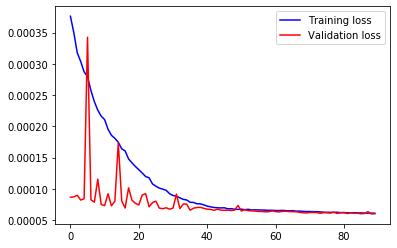

In [18]:
n = 10
plt.plot(history.history['loss'][n:], color='b', label="Training loss")
plt.plot(history.history['val_loss'][n:], color='r', label="Validation loss")
plt.legend()

In [15]:
from sklearn.metrics import r2_score,mean_squared_error

y_pred = model.predict(X_test).ravel()
print(round(r2_score(y_test,y_pred),4))
print(round(mean_squared_error(y_test,y_pred),4))

0.3511
0.0001


In [16]:
print(round(df['target'].std(),4))

0.0096
